In [1]:
%matplotlib inline

In [2]:
### Import Packages

import matplotlib.pyplot as plt
import numpy as np
import starry
import pandas as pd
from glob import glob
import os
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts

np.random.seed(12)
starry.config.lazy = False
starry.config.quiet = True

In [3]:
#### Read in light curves, set an error:
r5_0degree = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")

## Rotation period 5 hours 0 degrees (equator on)
r5_0degree_flux = r5_0degree[1]
r5_0degree_flux = r5_0degree_flux/np.median(r5_0degree_flux)
time_r5_0degree =  r5_0degree[0]
sigma=0.001

# Rotation Period: 5 hours Degree: 90

## ydeg = 1 

In [4]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=1, reflected=False)
map.obl = 0
map.inc = 90

In [5]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [6]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [7]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [8]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 316 ms, sys: 84.6 ms, total: 400 ms
Wall time: 2.78 s


In [9]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg1_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [10]:
np.random.seed(5)
map.draw()

In [11]:
map.show(colorbar=True, projection="moll",dpi=500,file="r5_d0_ydeg1_random.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


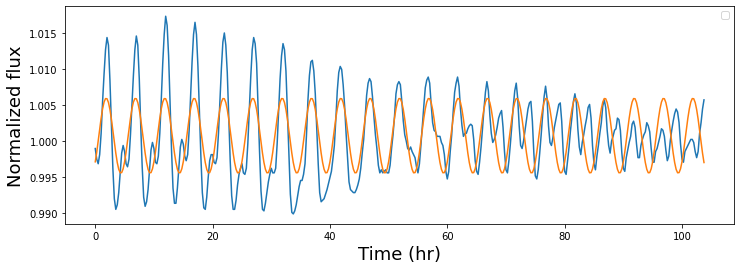

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

## ydeg = 2

In [13]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=2, reflected=False)
map.obl = 0
map.inc = 90

In [14]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [15]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [16]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [17]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 136 ms, sys: 5.43 ms, total: 141 ms
Wall time: 145 ms


In [18]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg2_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [19]:
np.random.seed(5)
map.draw()

In [20]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg2_random.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


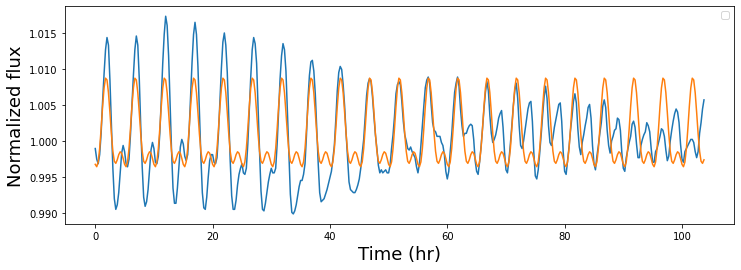

In [21]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

## ydeg = 3

In [22]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=3, reflected=False)
map.obl = 0
map.inc = 90

In [23]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [24]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [25]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [26]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 174 ms, sys: 5.77 ms, total: 180 ms
Wall time: 189 ms


In [27]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg3_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [28]:
np.random.seed(5)
map.draw()

In [29]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg3_random.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


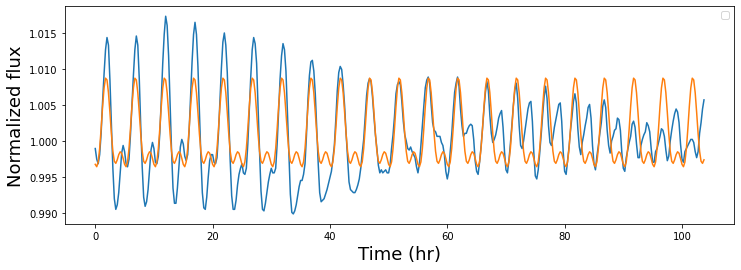

In [30]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

## ydeg = 4

In [31]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=4, reflected=False)
map.obl = 0
map.inc = 90

In [32]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [33]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [34]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [35]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 136 ms, sys: 4.73 ms, total: 141 ms
Wall time: 143 ms


In [36]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg4_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [37]:
np.random.seed(5)
map.draw()

In [38]:
map.show(colorbar=True, projection="moll",dpi=500,file="r5_d0_ydeg4_random.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


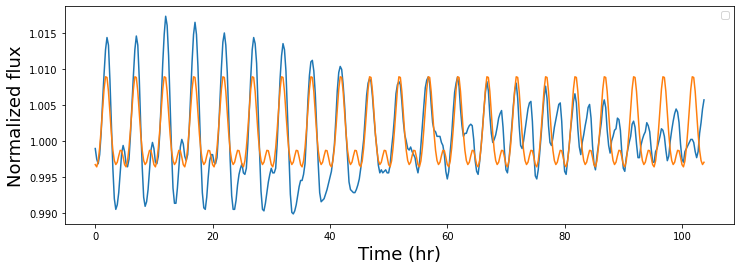

In [39]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

## ydeg = 5

In [40]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90

In [41]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [42]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [43]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [44]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 136 ms, sys: 4.23 ms, total: 140 ms
Wall time: 142 ms


In [45]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg5_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [46]:
np.random.seed(5)
map.draw()

In [47]:
map.show(colorbar=True, projection="moll",dpi=500,file="r5_d0_ydeg5_random.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


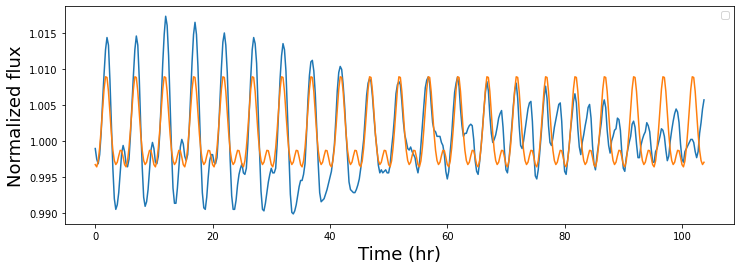

In [48]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()

## ydeg = 10

In [49]:
## now the fun part! 
## instantiate a map so we can do inference on this dataset
map = starry.Map(ydeg=10, reflected=False)
map.obl = 0
map.inc = 90

In [50]:
## set the data vector (the flux and the covariance matrix)
map.set_data(r5_0degree_flux, C=sigma ** 2)

In [51]:
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)

In [52]:
nrot=max(time_r5_0degree)/5
npts = len(time_r5_0degree)
theta = np.linspace(0, 360 * nrot, npts)
# Rotate to an observer inclination
map.inc=90


# Position of the star relative to the planet in the orbital plane
t = np.reshape(time_r5_0degree, (1, -1))
p = np.vstack((np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 0 * t))

ci = np.cos(map.inc * np.pi / 180)
si = np.sin(map.inc * np.pi / 180)
R = np.array([[1, 0, 0], [0, ci, -si], [0, si, ci]])
xs, ys, zs = R.dot(p)
kwargs = dict(theta=theta, xs=xs, ys=ys, zs=zs)

In [53]:
%%time
mu, cho_cov = map.solve(**kwargs)

CPU times: user 142 ms, sys: 6.52 ms, total: 149 ms
Wall time: 147 ms


In [54]:
map.show(colorbar=True, projection="moll",file="r5_d0_ydeg10_median.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


In [74]:
np.random.seed(10)
map.draw()

In [75]:
map.show(colorbar=True, projection="moll",dpi=500,file="r5_d0_ydeg10_randomseed10.jpg")

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


No handles with labels found to put in legend.


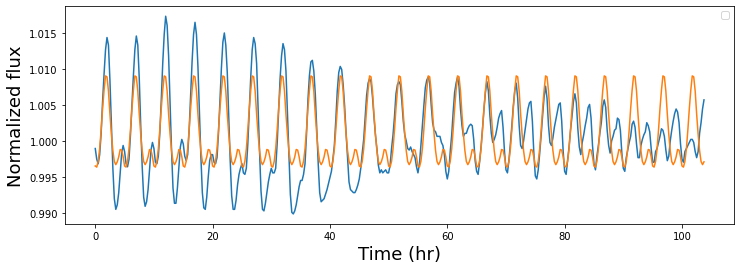

In [57]:
fig, ax = plt.subplots(1, figsize=(12, 4))
ax.plot(time_r5_0degree, r5_0degree_flux)
plt.plot(time_r5_0degree, map.flux(**kwargs))
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18);
ax.legend()